<br>

# RNN Project #03: TempCast - Time Series Forecasting with SimpleRNN, LSTM, GRU

### Libraries Used:
- numpy
- pandas
- matplotlib
- seaborn
- sklearn
- tensorflow

<br>

| Prepared by | Rayyan Ahmed |
|-------------|--------------|
| Date | 31st May, 2025 |

<br>

# 🔴 Importing Libraries

<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, Dropout, GRU, Bidirectional

<br>

# 🔴 Random Seed

<br>

In [2]:
tf.random.set_seed(1234)

<br>

# 🔴 Importing Dataset

<br>

In [3]:
df = pd.read_csv('temp.csv')
df

,Date,Temperature
0,1981-01-01,38.1
1,1981-01-02,32.4
2,1981-01-03,34.5
3,1981-01-04,20.7
4,1981-01-05,21.5
...,...,...
3645,1990-12-27,37.6
3646,1990-12-28,23.2
3647,1990-12-29,25.1
3648,1990-12-30,24.4


<br>

# 🔴 Value Counts

<br>

In [4]:
df['Temperature'].value_counts()

,count
Temperature,
18.5,42
16.0,41
15.0,40
19.0,39
13.7,36
...,...
38.4,1
31.9,1
8.9,1


<br>

# 🔴 Converting Data Column to Datetime

<br>

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

<br>

# 🔴 Scatter Plot

<br>

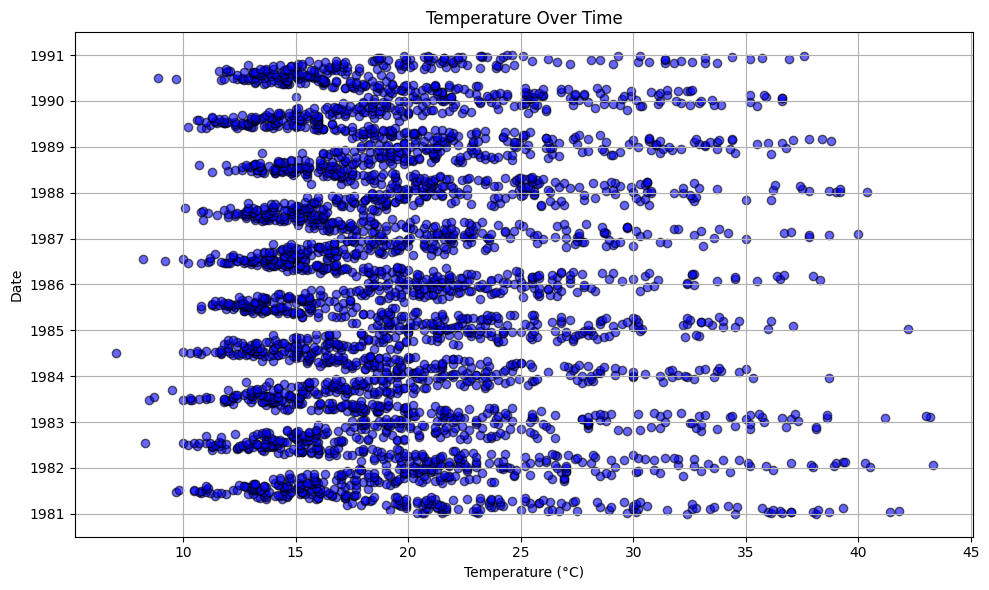

In [6]:
import matplotlib.pyplot as plt

y = df['Date']
x = df['Temperature']

plt.figure(figsize=(10, 6))

plt.scatter(x, y, color='blue', alpha=0.6, edgecolors='k')

plt.title('Temperature Over Time')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date')

plt.grid(True)
plt.tight_layout()

plt.show()


<br>

# 🔴 Date vs Temp Plot

<br>

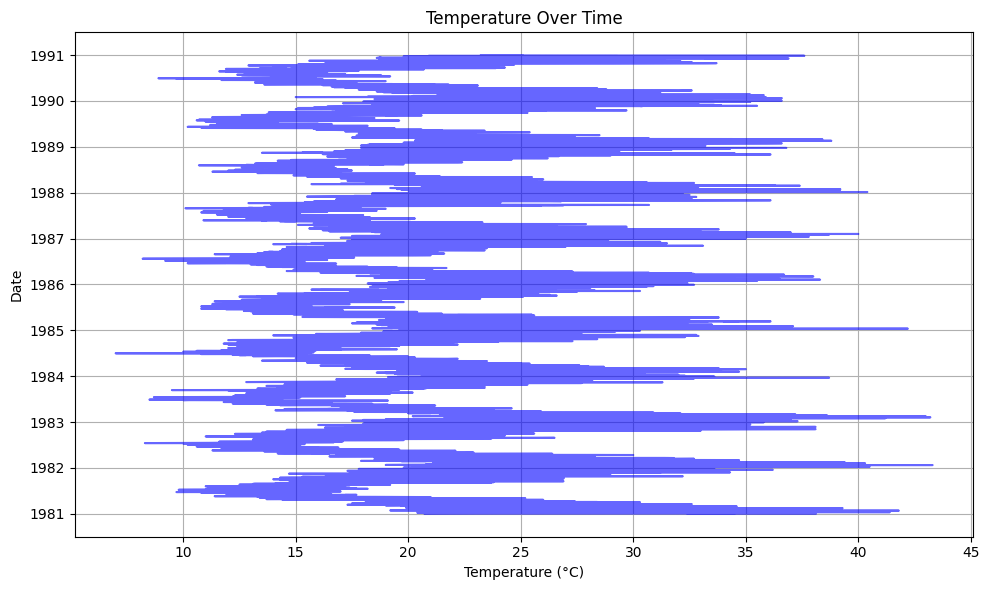

In [7]:
import matplotlib.pyplot as plt

y = df['Date']
x = df['Temperature']

plt.figure(figsize=(10, 6))

plt.plot(x, y, color='blue', alpha=0.6)

plt.title('Temperature Over Time')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date')

plt.grid(True)
plt.tight_layout()

plt.show()


<br>

# 🔴 BoxPlot

<br>

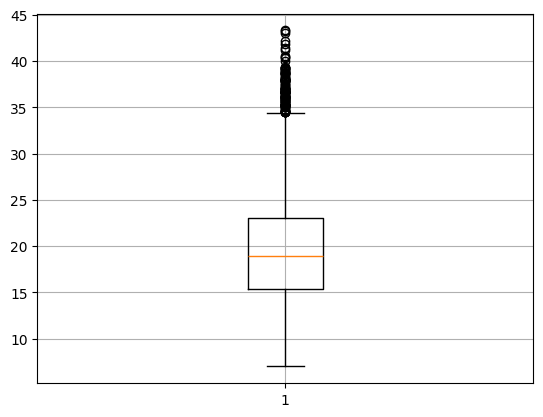

In [8]:
plt.boxplot(df['Temperature'])
plt.grid()
plt.show()

<br>

# 🔴 Histogram Plot

<br>

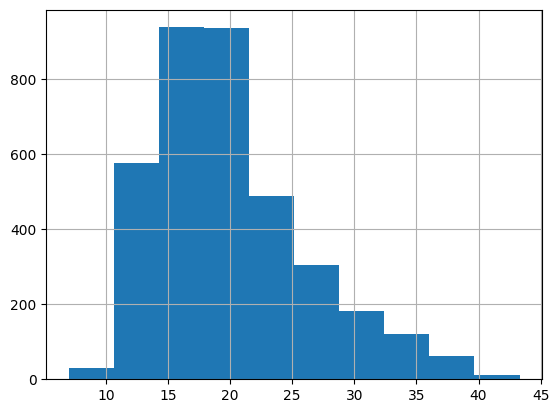

In [9]:
plt.hist(df['Temperature'])
plt.grid()
plt.show()

<br>

# 🔴 Null Values

<br>

In [10]:
df.isnull().sum()

,0
Date,0
Temperature,0


<br>

# 🔴 Dataset Info

<br>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3650 non-null   datetime64[ns]
 1   Temperature  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


<br>

# 🔴 Column Shape

<br>

In [12]:
df['Temperature'].shape, df['Date'].shape

((3650,), (3650,))

<br>

# 🔴 Dataset

<br>

In [13]:
df

,Date,Temperature
0,1981-01-01,38.1
1,1981-01-02,32.4
2,1981-01-03,34.5
3,1981-01-04,20.7
4,1981-01-05,21.5
...,...,...
3645,1990-12-27,37.6
3646,1990-12-28,23.2
3647,1990-12-29,25.1
3648,1990-12-30,24.4


<br>

# 🔴 Sorting Values

<br>

In [14]:
df.sort_values('Date')

,Date,Temperature
0,1981-01-01,38.1
1,1981-01-02,32.4
2,1981-01-03,34.5
3,1981-01-04,20.7
4,1981-01-05,21.5
...,...,...
3645,1990-12-27,37.6
3646,1990-12-28,23.2
3647,1990-12-29,25.1
3648,1990-12-30,24.4


<br>

# 🔴 Reshaping Temperature

<br>

In [15]:
data = df['Temperature'].values.reshape(-1, 1)

<br>

# 🔴 Data Shape
<br>

In [16]:
data, data.shape

(array([[38.1],
        [32.4],
        [34.5],
        ...,
        [25.1],
        [24.4],
        [24.6]]),
 (3650, 1))

<br>

# 🔴 MinMaxScaler

<br>

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

<br>

# 🔴 Creating Sequences

<br>

In [18]:
x = []
y = []
step = 60

for i in range(len(scaled_data) - step):
    x_seq = scaled_data[i : i + step]
    y_seq = scaled_data[i + step]
    x.append(x_seq)
    y.append(y_seq)

x = np.array(x)
y = np.array(y)

<br>

# 🔴 x & y shape

<br>

In [19]:
x.shape, y.shape

((3590, 60, 1), (3590, 1))

<br>

# 🔴 Printing x

<br>

In [20]:
print(x)

[[[0.85674931]
  [0.69972452]
  [0.75757576]
  ...
  [0.73278237]
  [0.76033058]
  [0.74931129]]

 [[0.69972452]
  [0.75757576]
  [0.37741047]
  ...
  [0.76033058]
  [0.74931129]
  [0.55096419]]

 [[0.75757576]
  [0.37741047]
  [0.39944904]
  ...
  [0.74931129]
  [0.55096419]
  [0.4738292 ]]

 ...

 [[0.34710744]
  [0.68319559]
  [0.42424242]
  ...
  [0.38292011]
  [0.84297521]
  [0.44628099]]

 [[0.68319559]
  [0.42424242]
  [0.39669421]
  ...
  [0.84297521]
  [0.44628099]
  [0.49862259]]

 [[0.42424242]
  [0.39669421]
  [0.41322314]
  ...
  [0.44628099]
  [0.49862259]
  [0.47933884]]]


<br>

# 🔴 Printing y

<br>

In [21]:
print(y)

[[0.55096419]
 [0.4738292 ]
 [0.3553719 ]
 ...
 [0.49862259]
 [0.47933884]
 [0.48484848]]


<br>

# 🔴 Length of Scaled Data

<br>

In [22]:
len(scaled_data)

3650

<br>

# 🔴 Splitting Dataset

<br>

In [23]:
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

<br>

# 🔴 Splitted Dataset Shape

<br>

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2872, 60, 1), (718, 60, 1), (2872, 1), (718, 1))

<br>

---

# 🔴 SimpleRNN

---

<br>

In [26]:
model = Sequential([
    SimpleRNN(64, return_sequences = True, input_shape = (x.shape[1], 1)),
    SimpleRNN(32),
    Dense(1)
])

<br>

# 🔴 Model

<br>

In [27]:
model

<Sequential name=sequential_1, built=True>

<br>

# 🔴 Model Summary

<br>

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

<br>

# 🔴 Compiling Model

<br>

In [29]:
model.compile(optimizer = 'adam', loss = 'mse')

<br>

# 🔴 History

<br>

In [30]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.0358 - val_loss: 0.0128
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0133 - val_loss: 0.0120
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0130 - val_loss: 0.0120
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0129 - val_loss: 0.0120
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0129 - val_loss: 0.0121
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0130 - val_loss: 0.0123
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0129 - val_loss: 0.0122
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0123 - val_loss: 0.0117
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.

<br>

# 🔴 History

<br>

In [31]:
history.history

{'loss': [0.021494241431355476,
  0.013021940365433693,
  0.012876360677182674,
  0.01274020690470934,
  0.012680288404226303,
  0.01270232442766428,
  0.012600671499967575,
  0.012354504317045212,
  0.012239411473274231,
  0.012164188548922539,
  0.012106589041650295,
  0.012065944261848927,
  0.012041928246617317,
  0.012018287554383278,
  0.011985349468886852,
  0.01195104792714119,
  0.011916859075427055,
  0.011877900920808315,
  0.011839059181511402,
  0.01180186215788126,
  0.011768219992518425,
  0.011738431639969349,
  0.011709315702319145,
  0.011678479611873627,
  0.01165279746055603,
  0.011637937277555466,
  0.011617673560976982,
  0.01161365956068039,
  0.011606261134147644,
  0.011614011600613594,
  0.011596729047596455,
  0.011599238030612469,
  0.011563494801521301,
  0.011568427085876465,
  0.01152213104069233,
  0.011606589891016483,
  0.01159155648201704,
  0.011494495905935764,
  0.011567565612494946,
  0.011480291374027729,
  0.011509240604937077,
  0.011498298496

<br>

# 🔴 Prediction

<br>

In [32]:
predicted = model.predict(x_test)
predicted

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


array([[0.36039475],
       [0.61150855],
       [0.53249216],
       [0.6272196 ],
       [0.49137652],
       [0.46658793],
       [0.4059063 ],
       [0.52958995],
       [0.45505038],
       [0.40161672],
       [0.43221882],
       [0.6013795 ],
       [0.5103374 ],
       [0.5278459 ],
       [0.5949524 ],
       [0.6751564 ],
       [0.6374363 ],
       [0.67576224],
       [0.53910244],
       [0.42306048],
       [0.69336563],
       [0.46006083],
       [0.5174914 ],
       [0.6224936 ],
       [0.45799205],
       [0.5471067 ],
       [0.64331746],
       [0.67234856],
       [0.62150484],
       [0.52679986],
       [0.64059144],
       [0.7599625 ],
       [0.47367015],
       [0.6788302 ],
       [0.45529127],
       [0.5600595 ],
       [0.6137869 ],
       [0.64454716],
       [0.54466206],
       [0.49690852],
       [0.6201456 ],
       [0.51233965],
       [0.6682232 ],
       [0.7100795 ],
       [0.53334844],
       [0.47631738],
       [0.7323374 ],
       [0.522

<br>

# 🔴 Predicted Shape & Type

<br>

In [33]:
predicted.shape, type(predicted)

((718, 1), numpy.ndarray)

<br>

# 🔴 Inversing from Scaled to Actual Values

<br>

In [34]:
predicted_actual = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

<br>

# 🔴 Predicted Actual

<br>

In [35]:
predicted_actual

array([[20.082329 ],
       [29.197762 ],
       [26.329466 ],
       [29.768072 ],
       [24.836967 ],
       [23.937141 ],
       [21.734398 ],
       [26.224115 ],
       [23.518328 ],
       [21.578686 ],
       [22.689543 ],
       [28.830076 ],
       [25.525248 ],
       [26.160807 ],
       [28.596773 ],
       [31.508179 ],
       [30.138937 ],
       [31.53017  ],
       [26.569418 ],
       [22.357096 ],
       [32.169174 ],
       [23.700209 ],
       [25.784939 ],
       [29.59652  ],
       [23.62511  ],
       [26.859974 ],
       [30.352425 ],
       [31.406254 ],
       [29.560627 ],
       [26.122835 ],
       [30.25347  ],
       [34.58664  ],
       [24.194225 ],
       [31.641537 ],
       [23.527073 ],
       [27.33016  ],
       [29.280464 ],
       [30.397062 ],
       [26.771233 ],
       [25.037779 ],
       [29.511286 ],
       [25.597929 ],
       [31.256502 ],
       [32.775887 ],
       [26.360548 ],
       [24.29032  ],
       [33.583847 ],
       [25.97

<br>

# 🔴 y_test actual

<br>

In [36]:
y_test_actual

array([[25.3],
       [31. ],
       [33.2],
       [31. ],
       [18.2],
       [19.1],
       [22.2],
       [20.3],
       [19.8],
       [18.3],
       [27.5],
       [29.8],
       [31. ],
       [32.9],
       [35.5],
       [36. ],
       [36.6],
       [21.7],
       [19.8],
       [26.7],
       [22.9],
       [19.8],
       [24.9],
       [24.8],
       [28.8],
       [32.7],
       [33.7],
       [24.7],
       [21.6],
       [26.2],
       [33.4],
       [22.9],
       [31.2],
       [23.1],
       [24.4],
       [30.7],
       [38.8],
       [21.5],
       [20.7],
       [20.3],
       [21.3],
       [30. ],
       [37.1],
       [21.1],
       [22. ],
       [34.4],
       [33.8],
       [37.8],
       [38.4],
       [32.8],
       [34.4],
       [26.4],
       [27.3],
       [28. ],
       [30.7],
       [30.7],
       [23.4],
       [26.1],
       [26.1],
       [21.8],
       [18.9],
       [18.5],
       [17.5],
       [21.5],
       [25.1],
       [21.9],
       [24

<br>

# 🔴 Shape & Type of predicted_actual & y_test_actual

<br>

In [37]:
predicted_actual.shape, y_test_actual.shape, type(predicted_actual), type(y_test_actual)

((718, 1), (718, 1), numpy.ndarray, numpy.ndarray)

<br>

# 🔴 MSE, MAE, R2 Score

<br>

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_actual, predicted_actual)
mae = mean_absolute_error(y_test_actual, predicted_actual)
r2 = r2_score(y_test_actual, predicted_actual)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 16.87
Mean Absolute Error (MAE): 3.09
R² Score: 0.5514


<br>

# 🔴 Plotting Actual vs Predicted Values

<br>

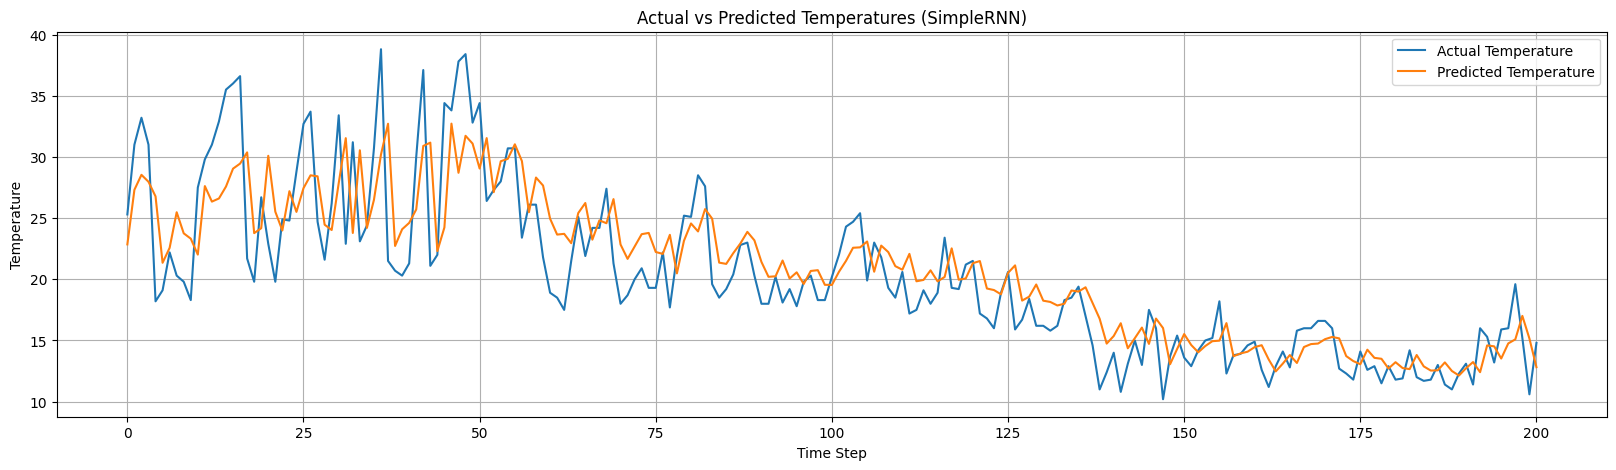

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(y_test_actual[: 201], label='Actual Temperature')
plt.plot(predicted_actual[: 201], label='Predicted Temperature')
plt.title('Actual vs Predicted Temperatures (SimpleRNN)')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()


In [40]:
scaled_data[-30:], len(scaled_data[-30:])

(array([[0.67217631],
        [0.47107438],
        [0.7768595 ],
        [0.82369146],
        [0.72176309],
        [0.79063361],
        [0.38842975],
        [0.40220386],
        [0.31955923],
        [0.32506887],
        [0.32231405],
        [0.40220386],
        [0.42424242],
        [0.38292011],
        [0.44903581],
        [0.75482094],
        [0.37741047],
        [0.4738292 ],
        [0.41873278],
        [0.45454545],
        [0.64187328],
        [0.35261708],
        [0.44903581],
        [0.61432507],
        [0.38292011],
        [0.84297521],
        [0.44628099],
        [0.49862259],
        [0.47933884],
        [0.48484848]]),
 30)

<br>

# 🔴 Predicting Temperature for Next 7 Days

<br>

In [41]:
last_sequence = scaled_data[-30:].reshape(1, 30, 1)

future_predictions = []

for _ in range(7):
    next_pred = model.predict(last_sequence)[0, 0]
    future_predictions.append(next_pred)

    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)

future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print("Next 7 days temperature forecast:")
print(future_predictions_actual.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Next 7 days temperature forecast:
[29.245829 29.723822 30.277952 32.427105 28.102715 31.078411 28.070877]


<br>

# 🔴 Plotting Temperature for Next 7 Days

<br>

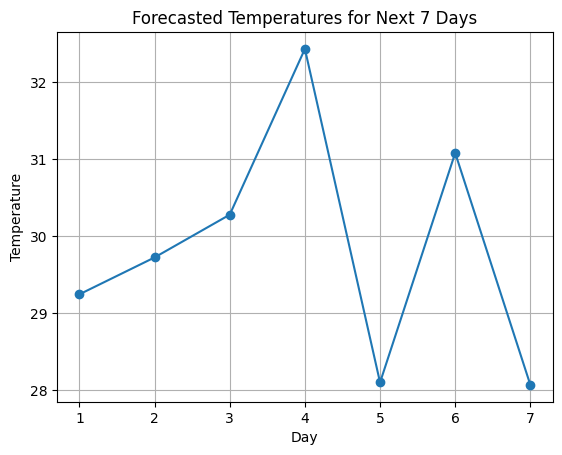

In [42]:
plt.plot(range(1, 8), future_predictions_actual, marker='o')
plt.title("Forecasted Temperatures for Next 7 Days")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

<br>

# 🔴 Putting Everything Together

<br>

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(x.shape[1], 1)),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.summary()

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_data = (x_test, y_test), callbacks=[early_stop])

history.history

predicted = model.predict(x_test)

predicted_actual = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

predicted_actual.shape, y_test_actual.shape, type(predicted_actual), type(y_test_actual)

mse = mean_squared_error(y_test_actual, predicted_actual)
mae = mean_absolute_error(y_test_actual, predicted_actual)
r2 = r2_score(y_test_actual, predicted_actual)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 60, 128)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 60, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,321 (141.88 KB)

 Trainable params: 36,321 (141.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0313 - mae: 0.1293 - val_loss: 0.0145 - val_mae: 0.0873
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0177 - mae: 0.1019 - val_loss: 0.0142 - val_mae: 0.0991
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0143 - mae: 0.0903 - val_loss: 0.0141 - val_mae: 0.0996
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0138 - mae: 0.0888 - val_loss: 0.0142 - val_mae: 0.0990
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0136 - mae: 0.0882 - val_loss: 0.0117 - val_mae: 0.0834
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mae: 0.0883 - val_loss: 0.0119 - val_mae: 0.0828
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0127 - mae: 0.0840 - val_loss: 0.0115 - val_mae: 0.0799
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0128 - mae: 0.0850 - val_loss: 0.0115 - val_mae: 0.0799
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.01

<br>

---

# 🔴 LSTM Model

---

<br>

In [48]:
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x.shape[1], 1)),
    LSTM(64, return_sequences = True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.summary()

lstm_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=11, restore_best_weights=True)

lstm_history = lstm_model.fit(x_train, y_train, epochs = 50, batch_size = 40, validation_data = (x_test, y_test), callbacks=[early_stop])

lstm_history.history

predicted = lstm_model.predict(x_test)

predicted_actual = scaler.inverse_transform(predicted)
y_test_actual = scaler.inverse_transform(y_test)

predicted_actual.shape, y_test_actual.shape, type(predicted_actual), type(y_test_actual)

mse = mean_squared_error(y_test_actual, predicted_actual)
mae = mean_absolute_error(y_test_actual, predicted_actual)
r2 = r2_score(y_test_actual, predicted_actual)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,609 (518.00 KB)

 Trainable params: 132,609 (518.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0438 - mae: 0.1534 - val_loss: 0.0158 - val_mae: 0.0900
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0162 - mae: 0.0975 - val_loss: 0.0155 - val_mae: 0.0900
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0161 - mae: 0.0970 - val_loss: 0.0152 - val_mae: 0.0899
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0161 - mae: 0.0968 - val_loss: 0.0152 - val_mae: 0.0899
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0160 - mae: 0.0966 - val_loss: 0.0154 - val_mae: 0.0899
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0160 - mae: 0.0963 - val_loss: 0.0157 - val_mae: 0.0900
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0160 - mae: 0.0957 - val_loss: 0.0159 - val_mae: 0.0902
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mae: 0.0952 - val_loss: 0.0160 - val_mae: 0.0904
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.015

<br>

# 🔴 Actual vs Predicted (LSTM)

<br>

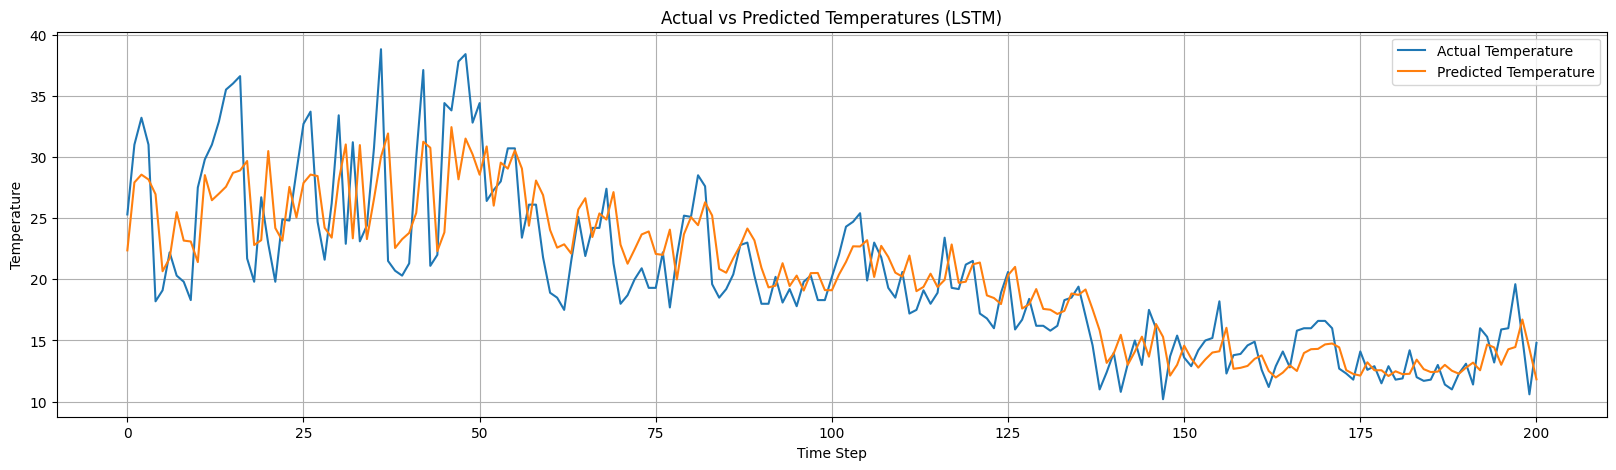

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(y_test_actual[: 201], label='Actual Temperature')
plt.plot(predicted_actual[: 201], label='Predicted Temperature')
plt.title('Actual vs Predicted Temperatures (LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

<br>

# 🔴 Predicting Temperature of Next 7 Days

<br>

In [50]:
last_sequence = scaled_data[-30:].reshape(1, 30, 1)
future_preds = []

for _ in range(7):
    pred = lstm_model.predict(last_sequence)[0, 0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[:, 1:, :], [[[pred]]], axis=1)

future_preds_actual = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

print("Next 7 days forecast:", future_preds_actual.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Next 7 days forecast: [25.939627 26.729118 26.753344 26.352936 25.878838 25.545683 25.37184 ]


<br>

# 🔴 Plotting Next 7 Days Temperature (LSTM)

<br>

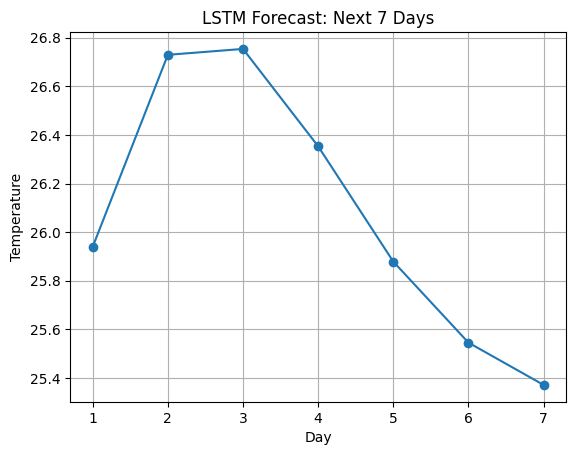

In [51]:

plt.plot(range(1, 8), future_preds_actual, marker='o')
plt.title("LSTM Forecast: Next 7 Days")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()


<br>

---

# 🔴 GRU Model

---

<br>

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(x.shape[1], 1)),
    GRU(64, return_sequences=True),
    GRU(32),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

gru_model.summary()

gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=11, restore_best_weights=True)

gru_history = gru_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=40,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

gru_history.history

gru_predicted = gru_model.predict(x_test)

gru_predicted_actual = scaler.inverse_transform(gru_predicted)
y_test_actual = scaler.inverse_transform(y_test)

gru_predicted_actual.shape, y_test_actual.shape, type(gru_predicted_actual), type(y_test_actual)

gru_mse = mean_squared_error(y_test_actual, gru_predicted_actual)
gru_mae = mean_absolute_error(y_test_actual, gru_predicted_actual)
gru_r2 = r2_score(y_test_actual, gru_predicted_actual)

print(f"Mean Squared Error (MSE): {gru_mse:.2f}")
print(f"Mean Absolute Error (MAE): {gru_mae:.2f}")
print(f"R² Score: {gru_r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 128)        │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 60, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,185 (395.25 KB)

 Trainable params: 101,185 (395.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0436 - mae: 0.1538 - val_loss: 0.0148 - val_mae: 0.0887
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0156 - mae: 0.0945 - val_loss: 0.0137 - val_mae: 0.0869
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0148 - mae: 0.0920 - val_loss: 0.0118 - val_mae: 0.0841
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0131 - mae: 0.0861 - val_loss: 0.0113 - val_mae: 0.0807
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0125 - mae: 0.0827 - val_loss: 0.0111 - val_mae: 0.0790
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0123 - mae: 0.0818 - val_loss: 0.0112 - val_mae: 0.0793
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0124 - mae: 0.0821 - val_loss: 0.0110 - val_mae: 0.0776
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0120 - mae: 0.0806 - val_loss: 0.0111 - val_mae: 0.0779
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.012

<br>

# 🔴 GRU - Orignal vs Actual

<br>

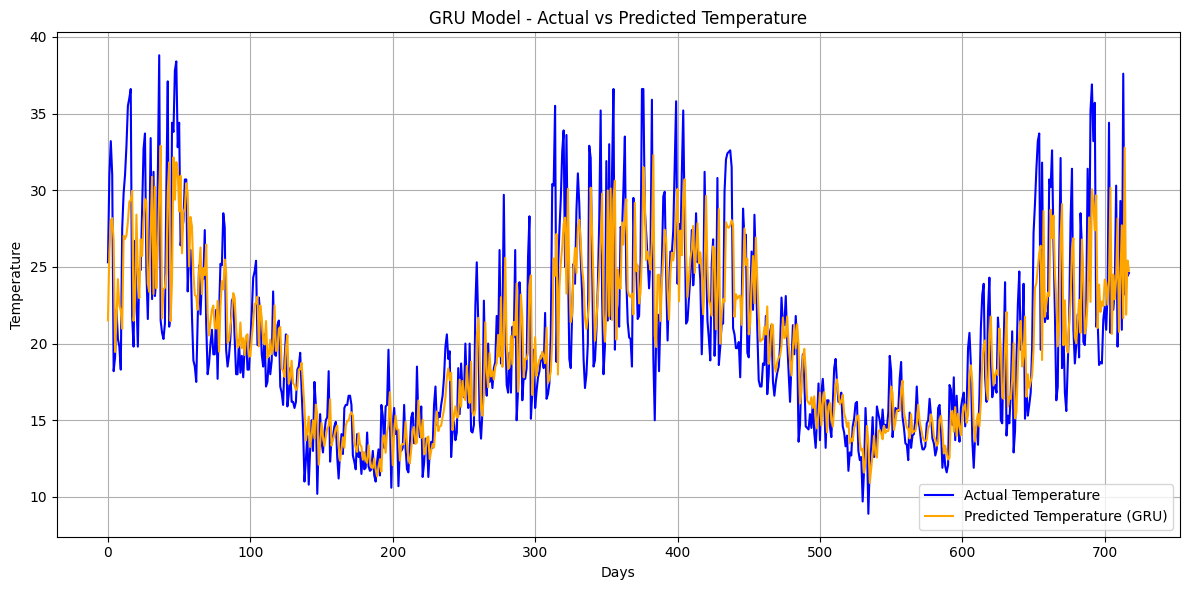

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Temperature', color='blue')
plt.plot(gru_predicted_actual, label='Predicted Temperature (GRU)', color='orange')
plt.title('GRU Model - Actual vs Predicted Temperature')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<br>

# GRU Forecast - Next 7 Days Temperature

<br>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


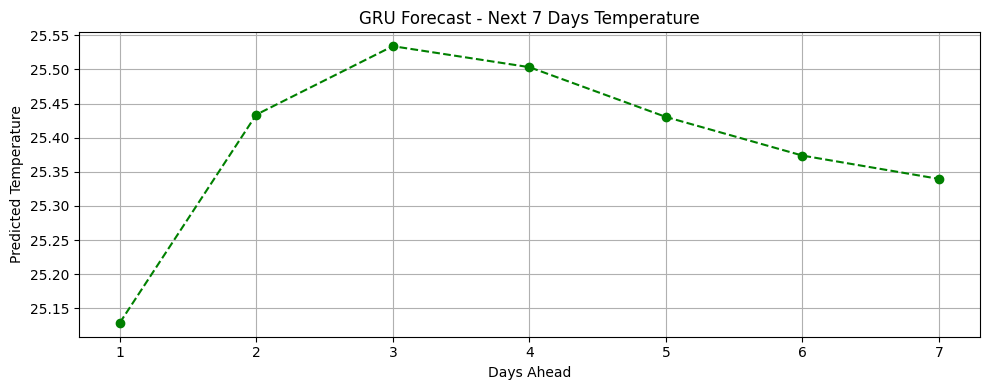

In [54]:
last_30_days = scaled_data[-30:]
forecast_input = last_30_days.reshape(1, 30, 1)

gru_forecast = []

for _ in range(7):
    pred = gru_model.predict(forecast_input)[0][0]
    gru_forecast.append(pred)

    forecast_input = np.append(forecast_input[:, 1:, :], [[[pred]]], axis=1)

gru_forecast_actual = scaler.inverse_transform(np.array(gru_forecast).reshape(-1, 1))

plt.figure(figsize=(10, 4))
plt.plot(range(1, 8), gru_forecast_actual, marker='o', linestyle='--', color='green')
plt.title('GRU Forecast - Next 7 Days Temperature')
plt.xlabel('Days Ahead')
plt.ylabel('Predicted Temperature')
plt.grid(True)
plt.xticks(range(1, 8))
plt.tight_layout()
plt.show()


In [55]:
# Save Model
model.save('model.keras')

# Save LSTM model
lstm_model.save('lstm_temperature_model.keras')

# Save GRU model
gru_model.save('gru_temperature_model.keras')


In [ ]:
# Load Model
model = load_model('model.keras')

# Load LSTM
lstm_model = load_model('lstm_temperature_model.keras')

# Load GRU
gru_model = load_model('gru_temperature_model.keras')
